# Stock Market Analysis

In [1]:
# Import Modules
import os
import sys

import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = Path('/content/drive/MyDrive/DataSets/')

Mounted at /content/drive


In [2]:

data_dir = Path('D:/GitHub/DSC680/Project1-stock-market-technical-indicators_and_Prediction/Data/')


## Read the data

In [7]:
os.chdir(data_dir.joinpath('Stocks'))
list = os.listdir()
number_files = len(list)
print('Number of stocks:' + str(number_files))

Number of stocks:7195


### Choose 4 random stock data for analysis

In [8]:

os.chdir(data_dir.joinpath('Stocks'))
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 4)
print(filenames)

['cpah.us.txt', 'hgv.us.txt', 'ahpau.us.txt', 'cmu.us.txt']


### Read data into dataframes and create lable column from filename

In [11]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])
    print('filename:' + os.path.join('',filename) + ' Label:' + label)

    data.append(df)

filename:cpah.us.txt Label:cpah
filename:hgv.us.txt Label:hgv
filename:ahpau.us.txt Label:ahpau
filename:cmu.us.txt Label:cmu


In [12]:
data[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2012-07-12,39.6,39.6,28.5,29.000,1312,0,cpah
1,2012-07-13,30.0,33.0,28.5,30.500,3335,0,cpah
2,2012-07-16,31.0,31.0,29.5,30.500,1170,0,cpah
3,2012-07-17,30.7,31.0,27.9,28.488,420,0,cpah
4,2012-07-18,29.5,33.9,27.9,29.999,1513,0,cpah


In [13]:
data[1].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2017-01-05,25.74,26.00,24.99,25.58,6358663,0,hgv
1,2017-01-06,25.69,27.00,25.69,26.55,2260197,0,hgv
2,2017-01-09,26.34,26.99,26.02,26.50,1735494,0,hgv
3,2017-01-10,26.55,26.55,25.51,25.79,3243325,0,hgv
4,2017-01-11,25.88,25.95,25.46,25.49,2460218,0,hgv


In [14]:
print(len(data))

4


## Add Technical Indicators in the dataframe

There are many types of Technical Indicators. 
The Technical Indicators we are considering are:
- RSI
- Volume (plain)
- Bollinger Bands
- Aroon Oscillator
- Price Volume Trend
- acceleration bands

In [14]:
TechIndicator = copy.deepcopy(data)

## Calculation of Relative Strength Index (RSI)

### Relative Strength Index
### PriceUp = Price > 0
### PriceDown = Price < 0
### Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
### Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
### PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};


In [12]:

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)


In [15]:
# Add Momentum_1D column for all stocks.
# Momentum_1D = P(t) - P(t-1)
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[1].tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
119,2017-11-06,1.95,1.98,1.9000,1.96,268339,0,nxe,0.04,61.349693
120,2017-11-07,1.98,1.98,1.8983,1.94,108920,0,nxe,-0.02,65.217391
121,2017-11-08,1.92,1.96,1.9200,1.92,214715,0,nxe,-0.02,66.265060
122,2017-11-09,1.98,2.43,1.9800,2.43,770529,0,nxe,0.51,84.942085
123,2017-11-10,2.47,2.47,2.2500,2.32,377170,0,nxe,-0.11,82.706767


In [16]:
TechIndicator[1].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
0,2017-05-18,2.25,2.3400,2.2400,2.28,99668,0,nxe,0.00,0.0
1,2017-05-19,2.29,2.4000,2.2900,2.40,155802,0,nxe,0.12,0.0
2,2017-05-22,2.41,2.8445,2.4099,2.50,170064,0,nxe,0.10,0.0
3,2017-05-23,2.60,2.6000,2.3400,2.37,130492,0,nxe,-0.13,0.0
4,2017-05-24,2.41,2.4100,2.2200,2.29,345457,0,nxe,-0.08,0.0


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

In [18]:
TechIndicator[0]["Open"]

0          0.28338
1          0.29161
2          0.29954
3          0.29954
4          0.29954
           ...    
12070    168.90000
12071    170.10000
12072    170.17000
12073    168.72000
12074    166.40000
Name: Open, Length: 12075, dtype: float64

In [19]:
TechIndicator[0]["Volume"]

0        3496683
1        2731316
2        2416160
3        3376623
4        2776338
          ...   
12070    3088382
12071    2505295
12072    2605473
12073    4218473
12074    4225689
Name: Volume, Length: 12075, dtype: int64

### Calculation of Volume (Plain)

In [21]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,1.42,46.438136,3088382
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,0.70,47.368421,2505295
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,-0.67,49.592228,2605473
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,-3.10,37.769456,4218473
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,-1.41,43.284832,4225689


### Calculation of Bollinger Bands

In [22]:
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [23]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20, numsd=1)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,1.42,46.438136,3088382,165.426,167.580,163.272
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,0.70,47.368421,2505295,165.936,168.088,163.783
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,-0.67,49.592228,2605473,166.283,168.522,164.044
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,-3.10,37.769456,4218473,166.438,168.610,164.265
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,-1.41,43.284832,4225689,166.448,168.615,164.282


### Calculation of Aroon Oscillator

how strong is the trend

In [25]:
def Aroon_Oscillator(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [26]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = Aroon_Oscillator(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


In [27]:
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
0,1970-01-02,0.28338,0.29161,0.28338,0.29161,3496683,0,mcd,0.00000,0.0,3496683,0.0,0.0,0.0,0.0
1,1970-01-05,0.29161,0.29954,0.29161,0.29954,2731316,0,mcd,0.00793,0.0,2731316,0.0,0.0,0.0,0.0
2,1970-01-06,0.29954,0.29954,0.29954,0.29954,2416160,0,mcd,0.00000,0.0,2416160,0.0,0.0,0.0,0.0
3,1970-01-07,0.29954,0.29954,0.29954,0.29954,3376623,0,mcd,0.00000,0.0,3376623,0.0,0.0,0.0,0.0
4,1970-01-08,0.29954,0.29954,0.29954,0.29954,2776338,0,mcd,0.00000,0.0,2776338,0.0,0.0,0.0,0.0


In [28]:
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,1.42,46.438136,3088382,165.426,167.580,163.272,96.0
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,0.70,47.368421,2505295,165.936,168.088,163.783,96.0
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,-0.67,49.592228,2605473,166.283,168.522,164.044,96.0
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,-3.10,37.769456,4218473,166.438,168.610,164.265,96.0
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,-1.41,43.284832,4225689,166.448,168.615,164.282,92.0


### Calculation of Price Volume Trend

PVT = [((CurrentClose - PreviousClose) / PreviousClose) x Volume] + PreviousPVT

In [29]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]+TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,1.42,46.438136,3088382,165.426,167.580,163.272,96.0,32415.570942
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,0.70,47.368421,2505295,165.936,168.088,163.783,96.0,36315.246736
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,-0.67,49.592228,2605473,166.283,168.522,164.044,96.0,89.346854
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,-3.10,37.769456,4218473,166.438,168.610,164.265,96.0,-87102.200179
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,-1.41,43.284832,4225689,166.448,168.615,164.282,92.0,-112557.845422


### Calculation of Acceleration Bands

lower envelope bands around a simple moving average. 

In [30]:
def abands(df):
    #df['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [31]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,1.42,46.438136,...,165.426,167.580,163.272,96.0,32415.570942,165.4260,174.079541,170.260858,164.979541,160.433608
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,0.70,47.368421,...,165.936,168.088,163.783,96.0,36315.246736,165.9355,173.429931,170.653121,166.929931,160.998371
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,-0.67,49.592228,...,166.283,168.522,164.044,96.0,89.346854,166.2830,173.872697,170.916571,166.522697,161.559321
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,-3.10,37.769456,...,166.438,168.610,164.265,96.0,-87102.200179,166.4375,175.457322,171.305625,159.957322,161.580875
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,-1.41,43.284832,...,166.448,168.615,164.282,92.0,-112557.845422,166.4485,173.425139,171.557762,157.025139,161.370512


## Drop unwanted columns

In [32]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
0,1970-01-02,0.28338,0.29161,0.28338,0.29161,3496683,0,mcd,0.0,3496683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1970-01-05,0.29161,0.29954,0.29161,0.29954,2731316,0,mcd,0.0,2731316,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,1970-01-06,0.29954,0.29954,0.29954,0.29954,2416160,0,mcd,0.0,2416160,0.0,0.0,0.0,0.0,74275.010734,0.0,0.0,0.0
3,1970-01-07,0.29954,0.29954,0.29954,0.29954,3376623,0,mcd,0.0,3376623,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1970-01-08,0.29954,0.29954,0.29954,0.29954,2776338,0,mcd,0.0,2776338,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Calculation of Price Rate of Change

In [33]:
# ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['ROC'] = ((TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(12))/(TechIndicator[stock]['Close'].shift(12)))*100
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,ROC
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,46.438136,3088382,165.426,167.580,163.272,96.0,32415.570942,165.4260,170.260858,160.433608,2.144144
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,47.368421,2505295,165.936,168.088,163.783,96.0,36315.246736,165.9355,170.653121,160.998371,2.687913
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,49.592228,2605473,166.283,168.522,164.044,96.0,89.346854,166.2830,170.916571,161.559321,4.138607
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,37.769456,4218473,166.438,168.610,164.265,96.0,-87102.200179,166.4375,171.305625,161.580875,1.903832
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,43.284832,4225689,166.448,168.615,164.282,92.0,-112557.845422,166.4485,171.557762,161.370512,1.228757


### Calculation of Momentum 

In [34]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum'] = TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,ROC,Momentum
12070,2017-11-06,168.90,170.42,168.60,170.07,3088382,0,mcd,46.438136,3088382,165.426,167.580,163.272,96.0,32415.570942,165.4260,170.260858,160.433608,2.144144,3.16
12071,2017-11-07,170.10,170.82,169.52,170.77,2505295,0,mcd,47.368421,2505295,165.936,168.088,163.783,96.0,36315.246736,165.9355,170.653121,160.998371,2.687913,4.40
12072,2017-11-08,170.17,170.92,169.45,170.10,2605473,0,mcd,49.592228,2605473,166.283,168.522,164.044,96.0,89.346854,166.2830,170.916571,161.559321,4.138607,2.00
12073,2017-11-09,168.72,169.20,166.10,167.00,4218473,0,mcd,37.769456,4218473,166.438,168.610,164.265,96.0,-87102.200179,166.4375,171.305625,161.580875,1.903832,-1.65
12074,2017-11-10,166.40,166.80,163.52,165.59,4225689,0,mcd,43.284832,4225689,166.448,168.615,164.282,92.0,-112557.845422,166.4485,171.557762,161.370512,1.228757,-4.48


# Visualization of technical indicators

In [35]:
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,ROC,Momentum
0,1970-01-02,0.28338,0.29161,0.28338,0.29161,3496683,0,mcd,0.0,3496683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
1,1970-01-05,0.29161,0.29954,0.29161,0.29954,2731316,0,mcd,0.0,2731316,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
2,1970-01-06,0.29954,0.29954,0.29954,0.29954,2416160,0,mcd,0.0,2416160,0.0,0.0,0.0,0.0,74275.010734,0.0,0.0,0.0,0.0,0.00000
3,1970-01-07,0.29954,0.29954,0.29954,0.29954,3376623,0,mcd,0.0,3376623,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
4,1970-01-08,0.29954,0.29954,0.29954,0.29954,2776338,0,mcd,0.0,2776338,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00793


In [36]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [37]:
TechIndicator[0].head()

,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,ROC,Momentum
Date,,,,,,,,,,,,,,,,,,,
1970-01-02,0.28338,0.29161,0.28338,0.29161,3496683,0,mcd,0.0,3496683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
1970-01-05,0.29161,0.29954,0.29161,0.29954,2731316,0,mcd,0.0,2731316,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
1970-01-06,0.29954,0.29954,0.29954,0.29954,2416160,0,mcd,0.0,2416160,0.0,0.0,0.0,0.0,74275.010734,0.0,0.0,0.0,0.0,0.00000
1970-01-07,0.29954,0.29954,0.29954,0.29954,3376623,0,mcd,0.0,3376623,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
1970-01-08,0.29954,0.29954,0.29954,0.29954,2776338,0,mcd,0.0,2776338,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00793


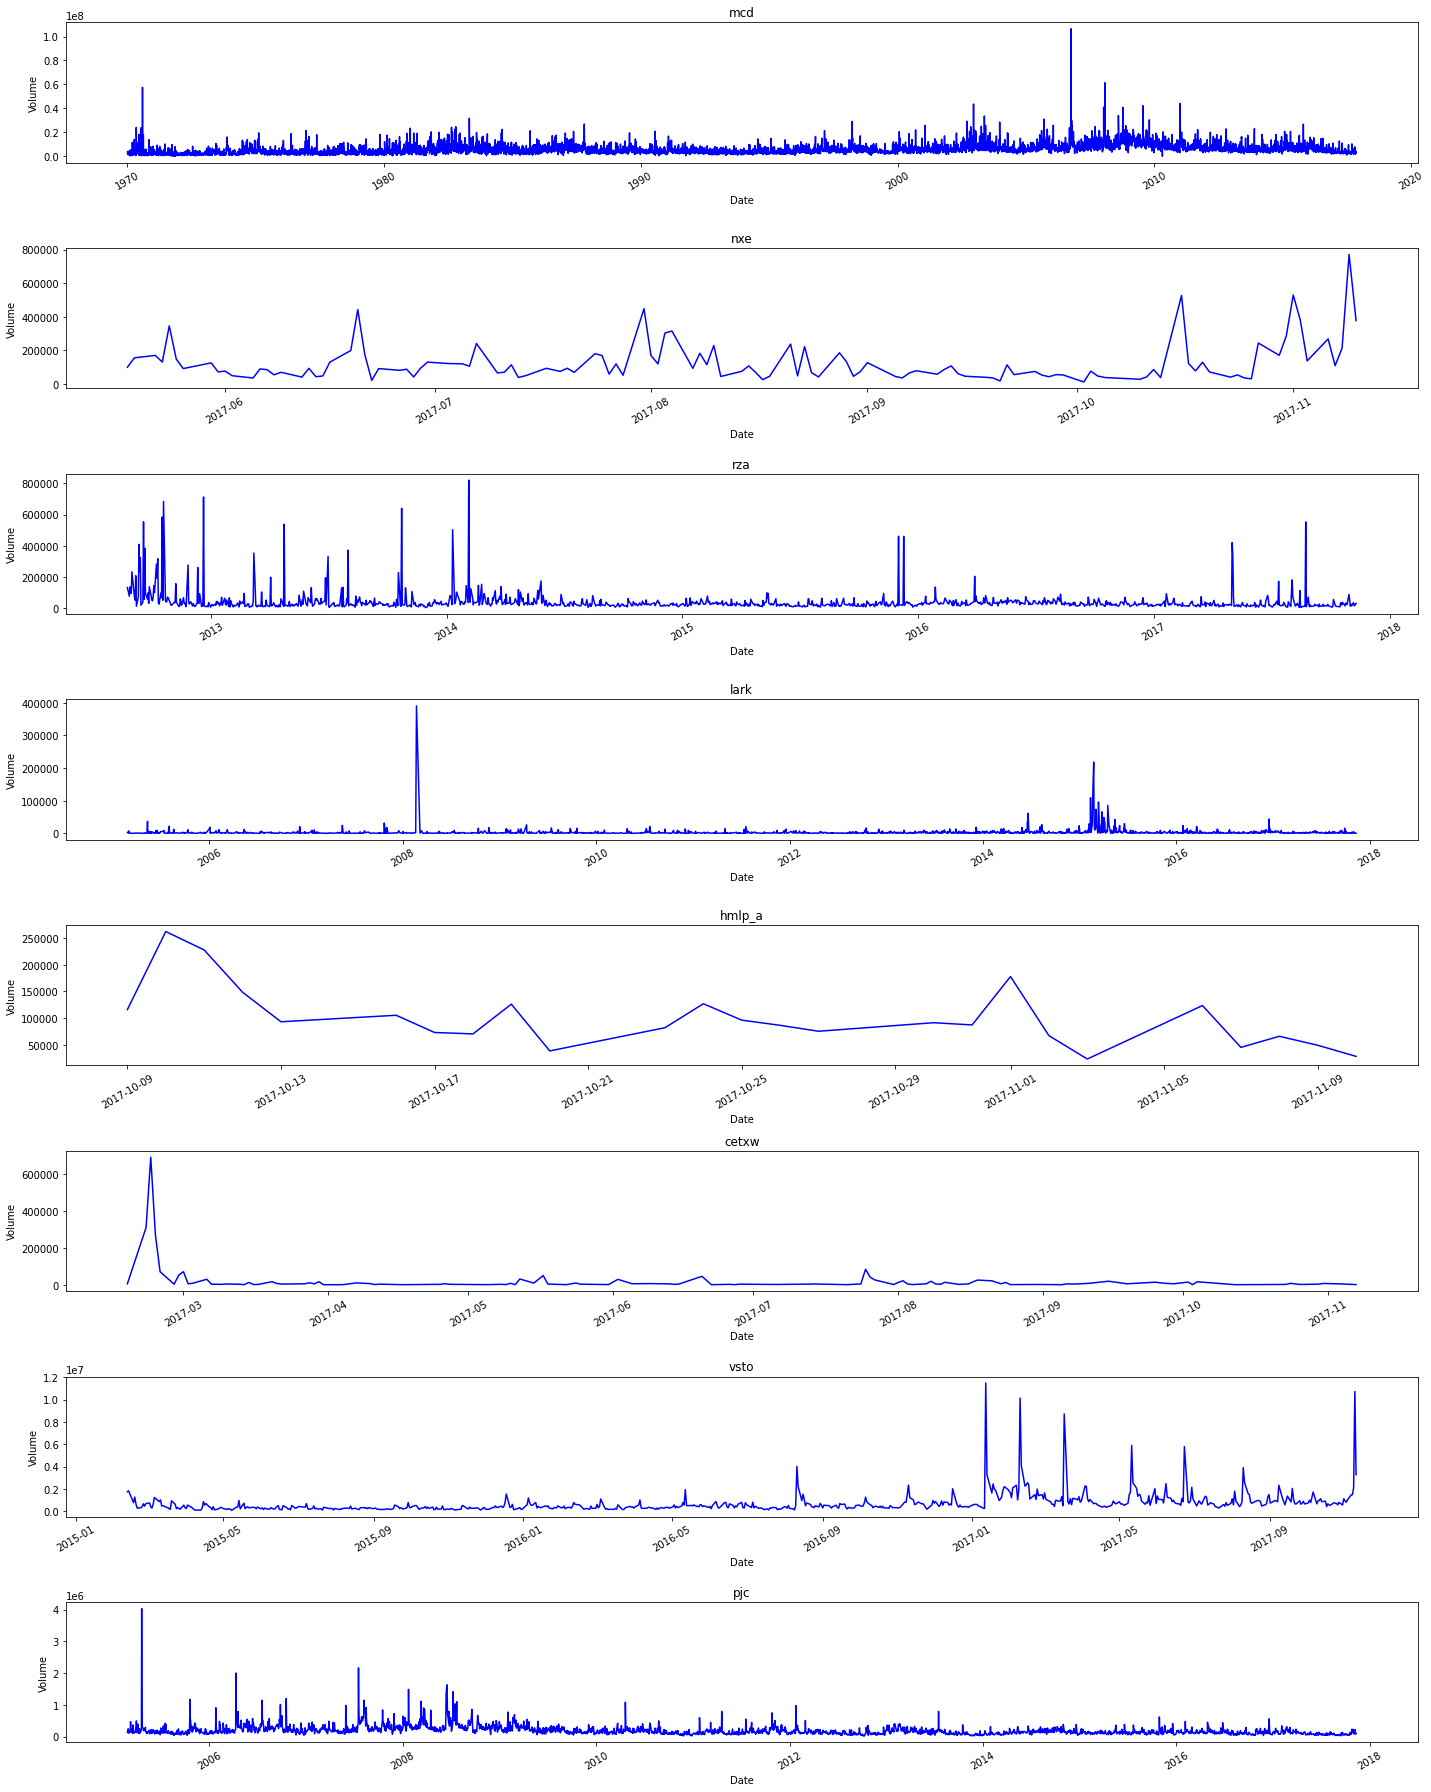

In [42]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

Bollinger Bands

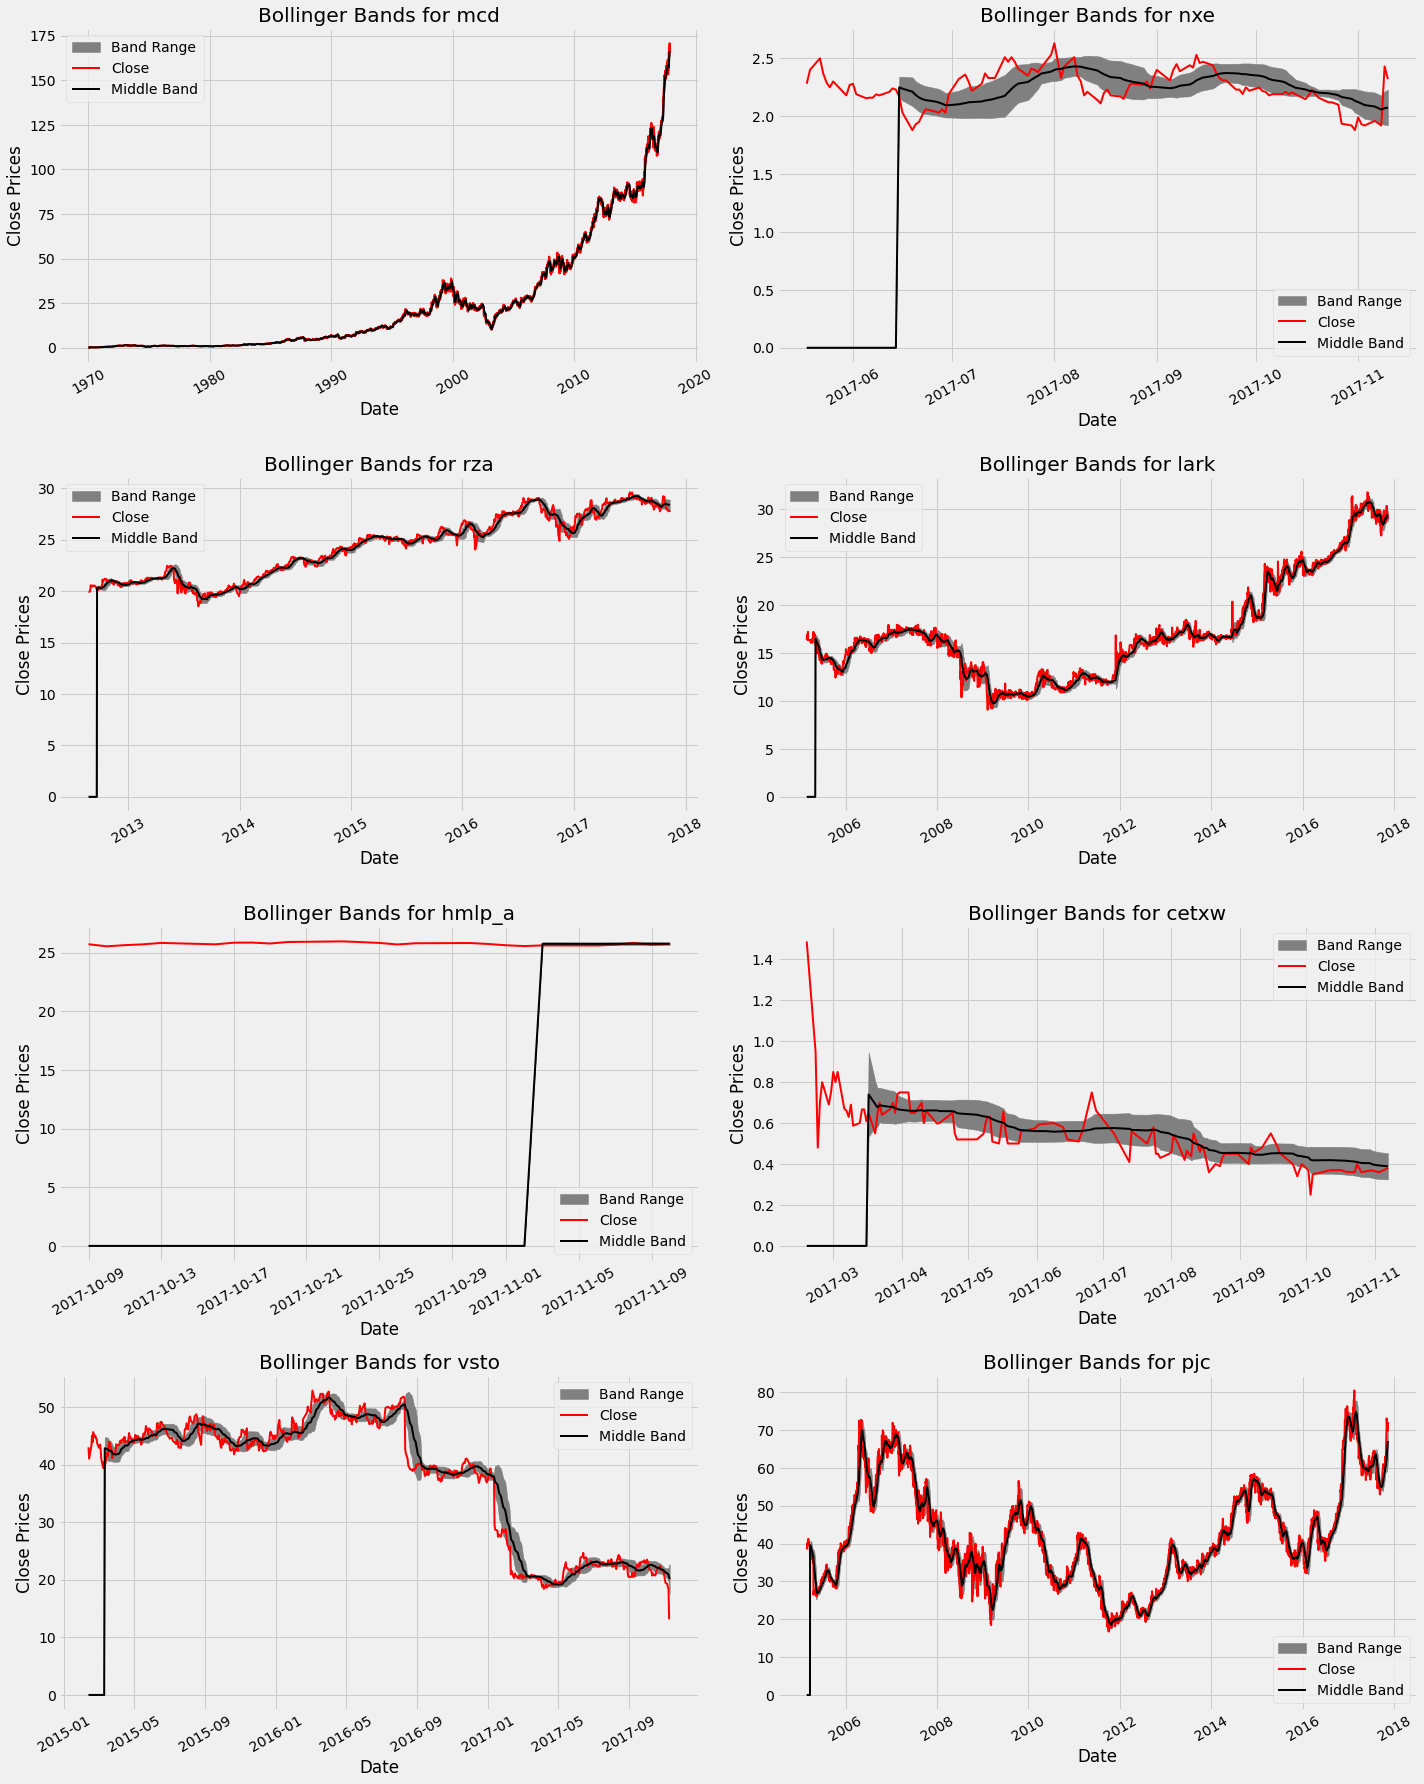

In [43]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()
#.dt.to_pydatetime()

<ipython-input-44-c5533e31b38a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


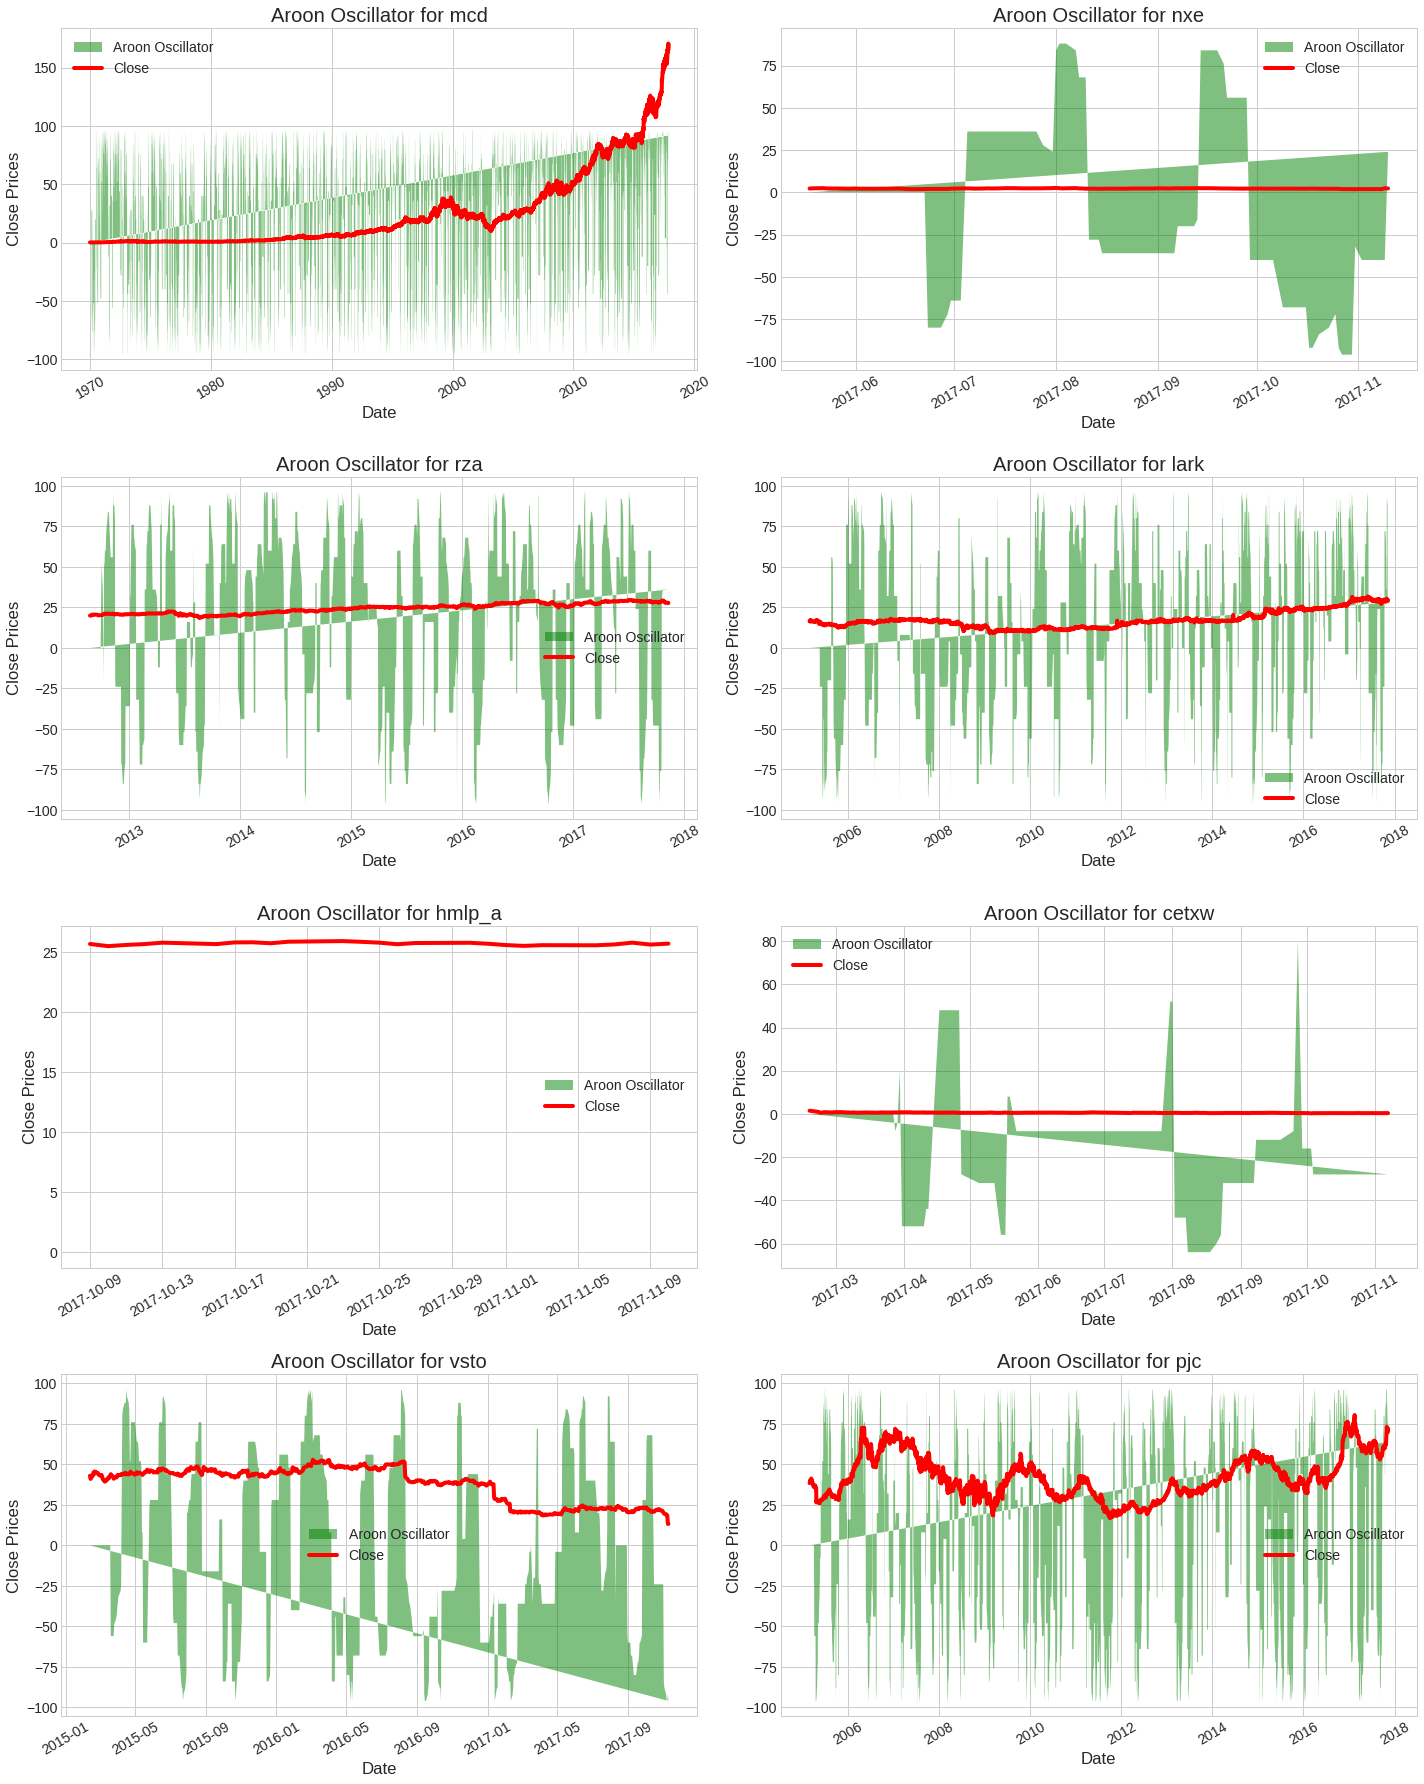

In [44]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

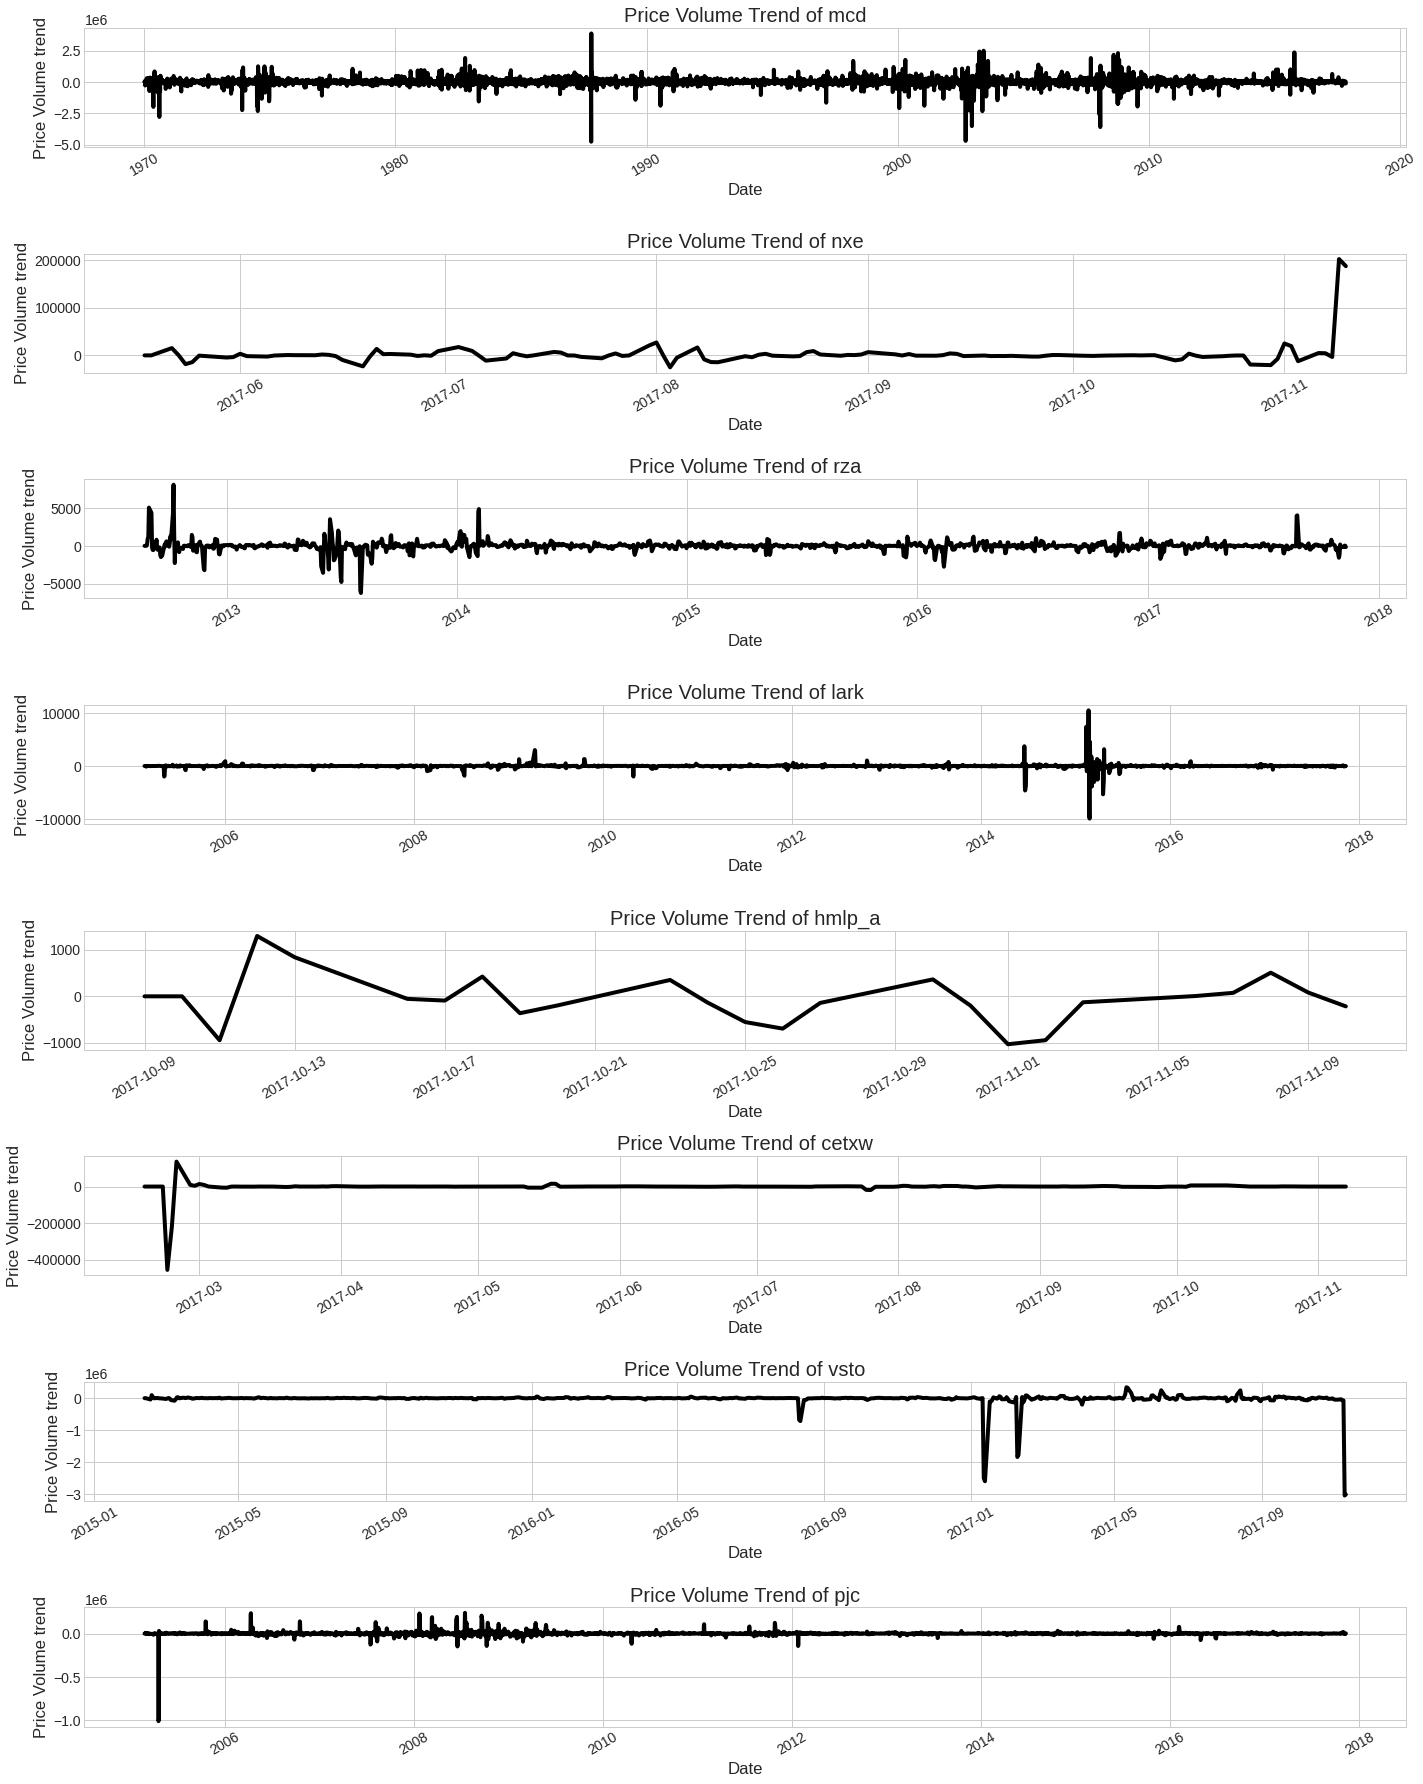

In [45]:
# PRice Volume Trend Plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

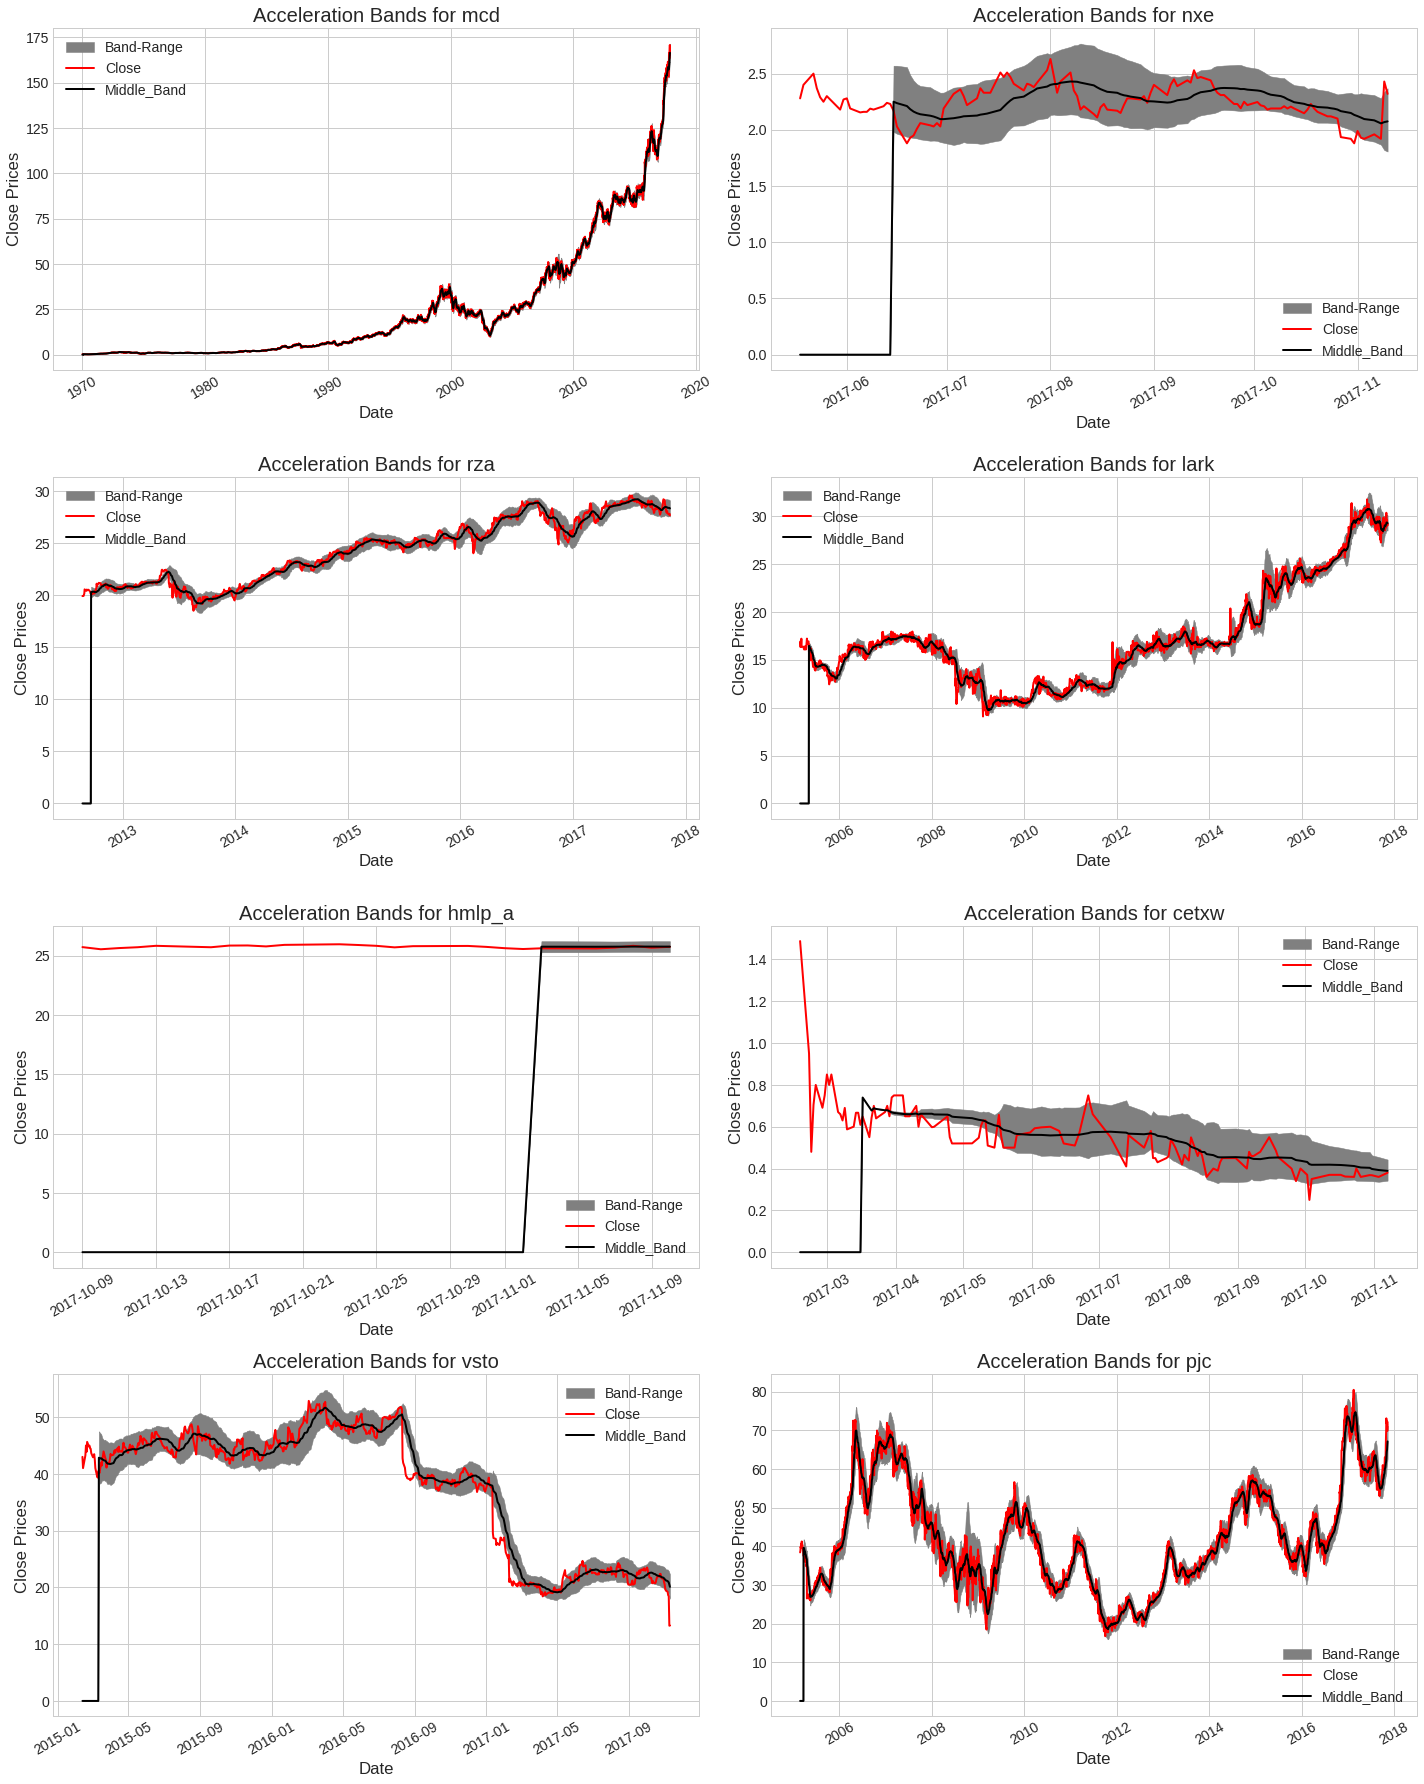

In [46]:
# Acceleration band Plot

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

I have also tried prediction of movement of stock market based on this data. You can refer to that kernel here: https://www.kaggle.com/kratisaxena/lstm-gru-models-for-stock-movement-analysis